In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy
from pandas_profiling import ProfileReport
from pandas.api.types import CategoricalDtype
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import accuracy_score, f1_score
plt.style.use('seaborn-whitegrid')
%matplotlib inline

np.random.seed(42)

In [2]:
df = pd.read_csv("../data/kaggle_location_dataset/Location446-30cls-5k.lrn.csv")
geosocial_type = CategoricalDtype(categories=[f"{i}" for i in range(1, 31)], ordered=True)
df['class'] = df['class'].apply(str).astype(geosocial_type)
df = df.drop("ID", axis=1)
df = df.sample(frac=1)

X = df.iloc[:, 1:]
y = df["class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle = True)

## KNN

Parameter: n_neighbors

 200 / 200

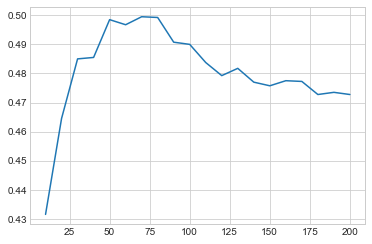

In [5]:
max_neighbors = 200
neighbors = range(10, max_neighbors+1, 10)

avg_scores_n = []
for k in neighbors:
    knn_cv = KNeighborsClassifier(n_neighbors=k, p=2, metric='minkowski')
    cv_scores = cross_val_score(knn_cv, X, y, cv=3)
    avg_score = np.mean(cv_scores)
    avg_scores_n.append(avg_score)
    print(f"\r {k} / {max_neighbors}", end="")
    
plt.plot(neighbors, avg_scores_n)

narrow down

 130 / 130

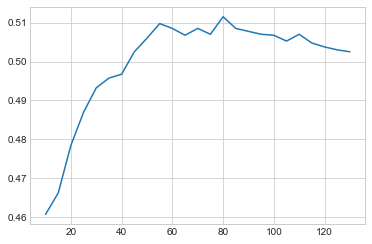

In [9]:
max_neighbors = 130
neighbors = range(10, max_neighbors+1, 5)

avg_scores = []
for k in neighbors:
    knn_cv = KNeighborsClassifier(n_neighbors=k, p=2, metric='minkowski')
    cv_scores = cross_val_score(knn_cv, X, y, cv=10)
    avg_score = np.mean(cv_scores)
    avg_scores.append(avg_score)
    print(f"\r {k} / {max_neighbors}", end="")
    
plt.plot(neighbors, avg_scores)

 100 / 100

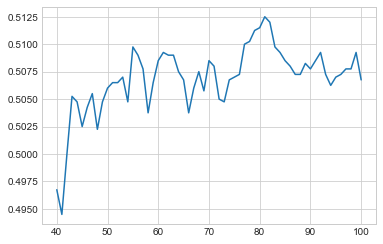

In [8]:
max_neighbors = 100
neighbors = range(40, max_neighbors+1, 1)

avg_scores = []
for k in neighbors:
    knn_cv = KNeighborsClassifier(n_neighbors=k, p=2, metric='minkowski')
    cv_scores = cross_val_score(knn_cv, X, y, cv=10)
    avg_score = np.mean(cv_scores)
    avg_scores.append(avg_score)
    print(f"\r {k} / {max_neighbors}", end="")
    
plt.plot(neighbors, avg_scores)

Parameter: Distance Metric

 Order 3: 200 / 200

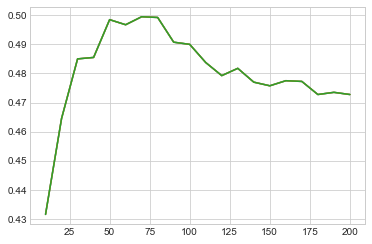

In [13]:
max_neighbors = 200
neighbors = range(10, max_neighbors+1, 10)

orders = [1,2,3]

avg_scores_p = {}

for order in orders:
    avg_scores_p[order] = []
    for k in neighbors:
        knn_cv = KNeighborsClassifier(n_neighbors=k, p=order, metric='minkowski')
        cv_scores = cross_val_score(knn_cv, X, y, cv=3)
        avg_score = np.mean(cv_scores)
        avg_scores_p[order].append(avg_score)
        print(f"\r\r Order {order}: {k} / {max_neighbors}", end="")

for order in orders:
    plt.plot(neighbors, avg_scores_p[order])

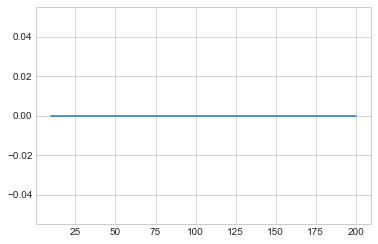

In [20]:
#plt.plot(neighbors, avg_scores[1])
#plt.plot(neighbors, avg_scores[2])
#plt.plot(neighbors, avg_scores[3])
diff = []
zip_object = zip(avg_scores[1], avg_scores[2])
for list1_i, list2_i in zip_object:
    diff.append(list1_i-list2_i)
plt.plot(neighbors, diff)

Makes sense, since 0^p = 0 and 1^p=1...

Parameter: weights

 Weight distance: 200 / 200

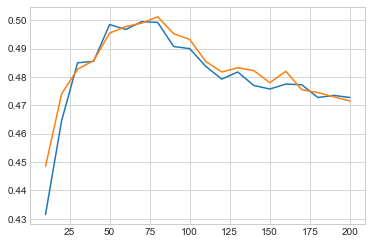

In [21]:
max_neighbors = 200
neighbors = range(10, max_neighbors+1, 10)

weights = ["uniform", "distance"]

avg_scores_w = {}

for weight in weights:
    avg_scores_w[weight] = []
    for k in neighbors:
        knn_cv = KNeighborsClassifier(n_neighbors=k, weights=weight, p=2, metric='minkowski')
        cv_scores = cross_val_score(knn_cv, X, y, cv=3)
        avg_score = np.mean(cv_scores)
        avg_scores_w[weight].append(avg_score)
        print(f"\r\r Weight '{weight}': {k} / {max_neighbors}", end="")

for weight in weights:
    plt.plot(neighbors, avg_scores_w[weight])

 Weight 'distance': 200 / 200

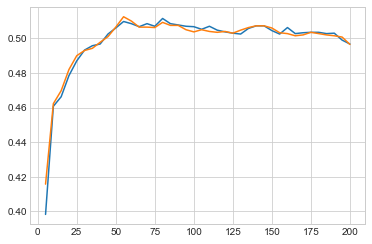

In [23]:
max_neighbors = 200
neighbors = range(5, max_neighbors+1, 5)

weights = ["uniform", "distance"]

avg_scores_w_ref = {}

for weight in weights:
    avg_scores_w_ref[weight] = []
    for k in neighbors:
        knn_cv = KNeighborsClassifier(n_neighbors=k, weights=weight, p=2, metric='minkowski')
        cv_scores = cross_val_score(knn_cv, X, y, cv=10)
        avg_score = np.mean(cv_scores)
        avg_scores_w_ref[weight].append(avg_score)
        print(f"\r\r Weight '{weight}': {k} / {max_neighbors}", end="")

for weight in weights:
    plt.plot(neighbors, avg_scores_w_ref[weight])

No clearly better weighting -> Use the simpler one

Parameter: n_components (PCA)

 200 / 200

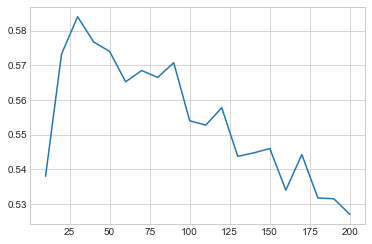

In [26]:
max_components = 200
components = range(10, max_components+1, 10)

knn_cv = KNeighborsClassifier(n_neighbors=81, weights="uniform", p=2, metric='minkowski')

avg_scores_pca = []
for comp in components:
    pca = PCA(n_components=comp, random_state=42)
    model = make_pipeline(pca, knn_cv)
    cv_scores = cross_val_score(model, X, y, cv=3)
    avg_score = np.mean(cv_scores)
    avg_scores_pca.append(avg_score)
    print(f"\r {comp} / {max_components}", end="")
    
plt.plot(components, avg_scores_pca)

Narrow down with more reliability (CV=10):

 100 / 100

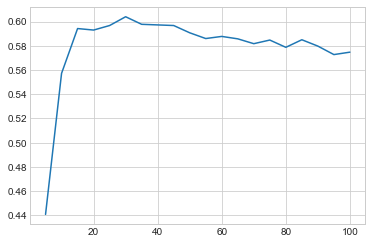

In [28]:
max_components = 100
components = range(5, max_components+1, 5)

knn_cv = KNeighborsClassifier(n_neighbors=81, weights="uniform", p=2, metric='minkowski')

avg_scores_pca_narrow = []
for comp in components:
    pca = PCA(n_components=comp, random_state=42)
    model = make_pipeline(pca, knn_cv)
    cv_scores = cross_val_score(model, X, y, cv=10)
    avg_score = np.mean(cv_scores)
    avg_scores_pca_narrow.append(avg_score)
    print(f"\r {comp} / {max_components}", end="")
    
plt.plot(components, avg_scores_pca_narrow)

 60 / 60

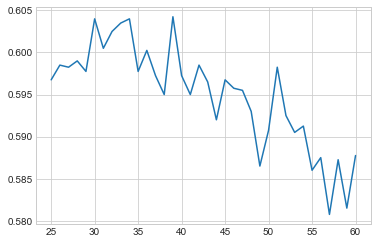

In [29]:
max_components = 60
components = range(25, max_components+1, 1)

knn_cv = KNeighborsClassifier(n_neighbors=81, weights="uniform", p=2, metric='minkowski')

avg_scores_pca_narrow = []
for comp in components:
    pca = PCA(n_components=comp, random_state=42)
    model = make_pipeline(pca, knn_cv)
    cv_scores = cross_val_score(model, X, y, cv=10)
    avg_score = np.mean(cv_scores)
    avg_scores_pca_narrow.append(avg_score)
    print(f"\r {comp} / {max_components}", end="")
    
plt.plot(components, avg_scores_pca_narrow)

Do everything again with PCA

n_neighbors

 200 / 200

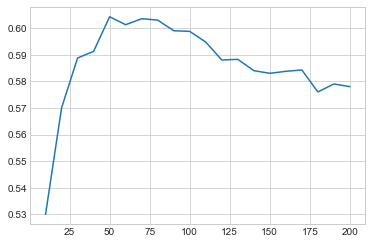

In [30]:
max_neighbors = 200
neighbors = range(10, max_neighbors+1, 10)

pca = PCA(n_components=33, random_state=42)

avg_scores_n_pca = []
for k in neighbors:
    knn_cv = KNeighborsClassifier(n_neighbors=k, weights="uniform", p=2, metric='minkowski')
    model = make_pipeline(pca, knn_cv)
    cv_scores = cross_val_score(model, X, y, cv=10)
    avg_score = np.mean(cv_scores)
    avg_scores_n_pca.append(avg_score)
    print(f"\r {k} / {max_neighbors}", end="")
    
plt.plot(neighbors, avg_scores_n_pca)

narrow down

 100 / 100

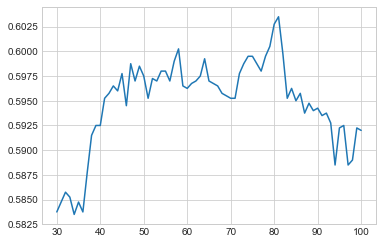

In [31]:
max_neighbors = 100
neighbors = range(30, max_neighbors+1, 1)

pca = PCA(n_components=33, random_state=42)

avg_scores_n_pca = []
for k in neighbors:
    knn_cv = KNeighborsClassifier(n_neighbors=k, weights="uniform", p=2, metric='minkowski')
    model = make_pipeline(pca, knn_cv)
    cv_scores = cross_val_score(model, X, y, cv=10)
    avg_score = np.mean(cv_scores)
    avg_scores_n_pca.append(avg_score)
    print(f"\r {k} / {max_neighbors}", end="")
    
plt.plot(neighbors, avg_scores_n_pca)

order p

 Order 3: 200 / 200

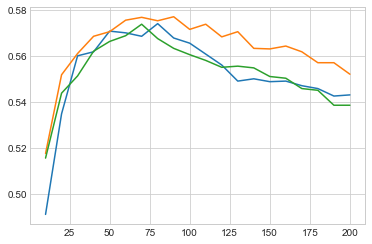

In [32]:
max_neighbors = 200
neighbors = range(10, max_neighbors+1, 10)

pca = PCA(n_components=33, random_state=42)

orders = [1,2,3]

avg_scores_p_pca = {}

for order in orders:
    avg_scores_p_pca[order] = []
    for k in neighbors:
        knn_cv = KNeighborsClassifier(n_neighbors=k, p=order, metric='minkowski')
        model = make_pipeline(pca, knn_cv)
        cv_scores = cross_val_score(model, X, y, cv=3)
        avg_score = np.mean(cv_scores)
        avg_scores_p_pca[order].append(avg_score)
        print(f"\r\r Order {order}: {k} / {max_neighbors}", end="")

for order in orders:
    plt.plot(neighbors, avg_scores_p_pca[order])

Order 2 seems to work best

weights

 Weight 'distance': 200 / 200

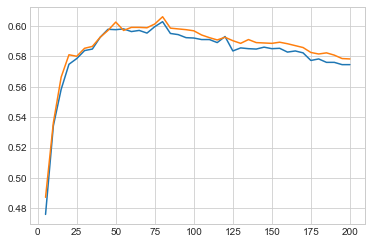

In [34]:
max_neighbors = 200
neighbors = range(5, max_neighbors+1, 5)

pca = PCA(n_components=33, random_state=42)

weights = ["uniform", "distance"]

avg_scores_w_ref_pca = {}

for weight in weights:
    avg_scores_w_ref_pca[weight] = []
    for k in neighbors:
        knn_cv = KNeighborsClassifier(n_neighbors=k, weights=weight, p=2, metric='minkowski')
        model = make_pipeline(pca, knn_cv)
        cv_scores = cross_val_score(model, X, y, cv=10)
        avg_score = np.mean(cv_scores)
        avg_scores_w_ref_pca[weight].append(avg_score)
        print(f"\r\r Weight '{weight}': {k} / {max_neighbors}", end="")

for weight in weights:
    plt.plot(neighbors, avg_scores_w_ref_pca[weight])

distance seems to generally outperform uniform

Conclusion search in hyperparameter space:

n_components = [10 - 50]

n_neighbors = [30 - 100]

p = [1,2]

weights = ["uniform", "distance"]

In [36]:
pca = PCA()
knn = KNeighborsClassifier(metric='minkowski')
pipe = Pipeline(steps=[("pca", pca), ("knn", knn)])

# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    "pca__n_components": range(10, 51, 2),
    "knn__n_neighbors": range(30, 101, 2),
    "knn__p": [1, 2],
    "knn__weights": ["uniform", "distance"],
}
search = GridSearchCV(pipe, param_grid, n_jobs=-1, cv=10)
search.fit(X, y)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.581):
{'knn__n_neighbors': 32, 'knn__p': 2, 'knn__weights': 'distance', 'pca__n_components': 12}


## Random Forest

n_estimators

 600 / 600

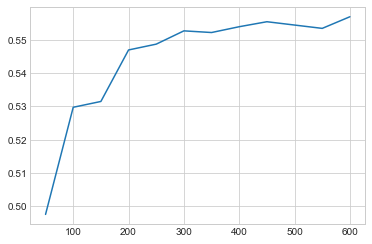

In [40]:
max_estimators = 600
estimators = range(50, max_estimators+1, 50)

rf_scores = []
for k in estimators:
    rf = RandomForestClassifier(n_estimators = k, random_state = 42)
    cv_scores = cross_val_score(rf, X, y, cv=3)
    avg_score = np.mean(cv_scores)
    rf_scores.append(avg_score)
    print(f"\r {k} / {max_estimators}", end="")
    
plt.plot(estimators, rf_scores)

 1250 / 1250

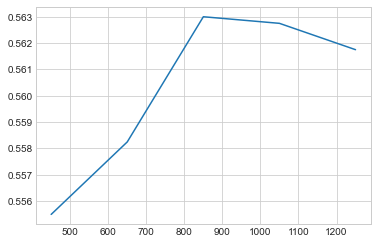

In [41]:
max_estimators = 1250
estimators = range(450, max_estimators+1, 200)

rf_scores = []
for k in estimators:
    rf = RandomForestClassifier(n_estimators = k, random_state = 42)
    cv_scores = cross_val_score(rf, X, y, cv=3)
    avg_score = np.mean(cv_scores)
    rf_scores.append(avg_score)
    print(f"\r {k} / {max_estimators}", end="")
    
plt.plot(estimators, rf_scores)

 1200 / 1200

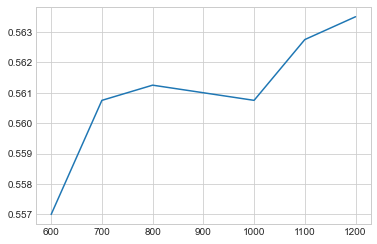

In [42]:
max_estimators = 1200
estimators = range(600, max_estimators+1, 100)

rf_scores_ref = []
for k in estimators:
    rf = RandomForestClassifier(n_estimators = k, random_state = 42)
    cv_scores = cross_val_score(rf, X, y, cv=3)
    avg_score = np.mean(cv_scores)
    rf_scores_ref.append(avg_score)
    print(f"\r {k} / {max_estimators}", end="")
    
plt.plot(estimators, rf_scores_ref)

max_depth

 50 / 50

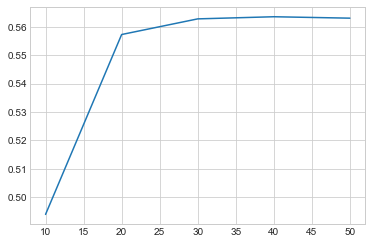

In [44]:
max_depth = 50
depths = range(10, max_depth+1, 10)

rf_scores_depth = []
for k in depths:
    rf = RandomForestClassifier(n_estimators = 850, max_depth=k, random_state = 42)
    cv_scores = cross_val_score(rf, X, y, cv=3)
    avg_score = np.mean(cv_scores)
    rf_scores_depth.append(avg_score)
    print(f"\r {k} / {max_depth}", end="")
    
plt.plot(depths, rf_scores_depth)

criterion

In [46]:
max_estimators = 1200
estimators = range(600, max_estimators+1, 100)

criterions = ["entropy", "gini"]

scores_c = {}

for crit in criterions:
    scores_c[crit] = []
    for k in estimators:
        rf = RandomForestClassifier(n_estimators = k, criterion=crit, max_depth=None, random_state = 42)
        cv_scores = cross_val_score(rf, X, y, cv=10)
        avg_score = np.mean(cv_scores)
        scores_c[crit].append(avg_score)
        print(f"\r\r Criterion '{crit}': {k} / {max_estimators}", end="")

for crit in criterions:
    plt.plot(estimators, scores_c[crit])

 Criterion 'entropy': 900 / 1200

KeyboardInterrupt: 

PCA

 60 / 60

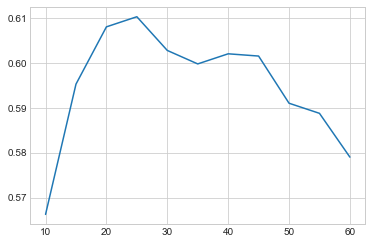

In [48]:
max_components = 60
components = range(10, max_components+1, 5)

rf = RandomForestClassifier(n_estimators = 100, random_state = 42)

rf_scores_pca = []
for comp in components:
    pca = PCA(n_components=comp, random_state=42)
    model = make_pipeline(pca, rf)
    cv_scores = cross_val_score(model, X, y, cv=10)
    avg_score = np.mean(cv_scores)
    rf_scores_pca.append(avg_score)
    print(f"\r {comp} / {max_components}", end="")
    
plt.plot(components, rf_scores_pca)

 600 / 600

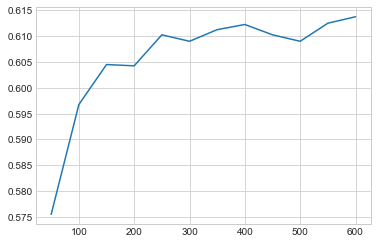

In [49]:
max_estimators = 600
estimators = range(50, max_estimators+1, 50)

pca = PCA(n_components=25, random_state=42)

rf_pca_scores = []
for k in estimators:
    rf = RandomForestClassifier(n_estimators = k, random_state = 42)
    model = make_pipeline(pca, rf)
    cv_scores = cross_val_score(model, X, y, cv=3)
    avg_score = np.mean(cv_scores)
    rf_pca_scores.append(avg_score)
    print(f"\r {k} / {max_estimators}", end="")
    
plt.plot(estimators, rf_pca_scores)

 1500 / 1500

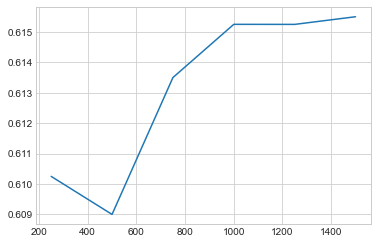

In [50]:
max_estimators = 1500
estimators = range(250, max_estimators+1, 250)

pca = PCA(n_components=25, random_state=42)

rf_pca_scores = []
for k in estimators:
    rf = RandomForestClassifier(n_estimators = k, random_state = 42)
    model = make_pipeline(pca, rf)
    cv_scores = cross_val_score(model, X, y, cv=3)
    avg_score = np.mean(cv_scores)
    rf_pca_scores.append(avg_score)
    print(f"\r {k} / {max_estimators}", end="")
    
plt.plot(estimators, rf_pca_scores)

 4000 / 4000

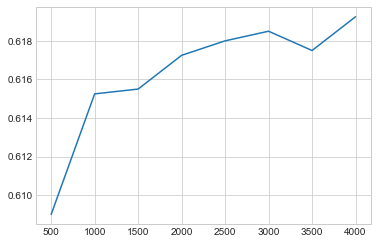

In [51]:
max_estimators = 4000
estimators = range(500, max_estimators+1, 500)

pca = PCA(n_components=25, random_state=42)

rf_pca_scores = []
for k in estimators:
    rf = RandomForestClassifier(n_estimators = k, random_state = 42)
    model = make_pipeline(pca, rf)
    cv_scores = cross_val_score(model, X, y, cv=3)
    avg_score = np.mean(cv_scores)
    rf_pca_scores.append(avg_score)
    print(f"\r {k} / {max_estimators}", end="")
    
plt.plot(estimators, rf_pca_scores)

 50 / 50

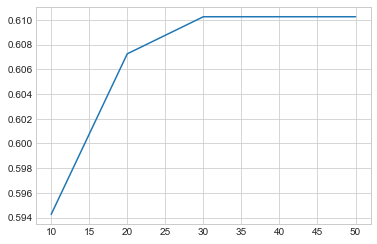

In [52]:
max_depth = 50
depths = range(10, max_depth+1, 10)

pca = PCA(n_components=25, random_state=42)

rf_pca_scores_depth = []
for k in depths:
    rf = RandomForestClassifier(n_estimators = 250, max_depth=k, random_state = 42)
    model = make_pipeline(pca, rf)
    cv_scores = cross_val_score(model, X, y, cv=3)
    avg_score = np.mean(cv_scores)
    rf_pca_scores_depth.append(avg_score)
    print(f"\r {k} / {max_depth}", end="")
    
plt.plot(depths, rf_pca_scores_depth)

## SVM

60 / 60

ValueError: x and y must have same first dimension, but have shapes (1,) and (11,)

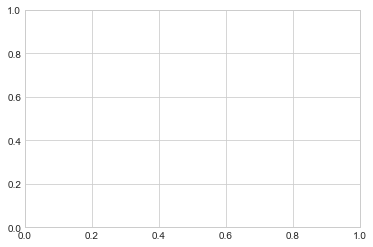

In [3]:
max_components = 60
components = range(10, max_components+1, 5)

kernels = ["poly", "rbf", "sigmoid", "linear"]

svm_pca_scores = {kern:[] for kern in kernels}

for comp in components:
    pca = PCA(n_components=comp, random_state=42)
    
    for kern in kernels:
        svm = SVC(kernel=kern, random_state = 42)
        model = make_pipeline(pca, svm)
        cv_scores = cross_val_score(model, X, y, cv=10)
        avg_score = np.mean(cv_scores)
        svm_pca_scores[kern].append(avg_score)
    
    print(f"\r\r{comp} / {max_components}", end="")

for kern in kernels:
    plt.plot(max_components, svm_pca_scores[kern])

In [ ]:
location_svm_accuracies_df = pd.DataFrame(list(zip(max_components,svm_pca_scores["poly"],
                                                   svm_pca_scores["rbf"],
                                                   svm_pca_scores["sigmoid"],
                                                   svm_pca_scores["linear"])), 
                                          columns=['components',"poly", "rbf", "sigmoid", "linear"])

fig, axs = plt.subplots(1, 1, figsize=(5, 5))

sns.lineplot(data=location_svm_accuracies_df, x='components', y='poly', ax=axs)
sns.lineplot(data=location_svm_accuracies_df, x='components', y='rbf', ax=axs)
sns.lineplot(data=location_svm_accuracies_df, x='components', y='sigmoid', ax=axs)
sns.lineplot(data=location_svm_accuracies_df, x='components', y='linear', ax=axs)

axs.set_ylabel("mean accuracy", fontsize= 12)
axs.set_title("Location dataset: SVM", fontsize= 12)
axs.set_xlabel("components", fontsize= 12)
axs.legend(title="kernel")

plt.savefig("location_svm_performances_components.png", dpi=300)

101.00000000000001 / 1000

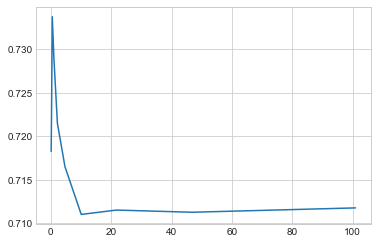

In [3]:
max_C = 100
cs = np.geomspace(0.1, max_C, 10)

pca = PCA(n_components=40, random_state=42)

svm_pca_scores_c = []
for c in cs:
    svm = SVC(C=c, kernel="linear", random_state = 42)
    model = make_pipeline(pca, svm)
    cv_scores = cross_val_score(model, X, y, cv=10)
    avg_score = np.mean(cv_scores)
    svm_pca_scores_c.append(avg_score)
    print(f"\r\r{c} / {max_C}", end="")

plt.plot(cs, svm_pca_scores_c)

6.0 / 53684210526 / 555

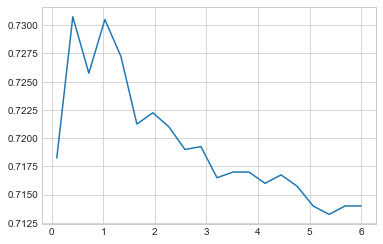

In [4]:
max_C = 5
cs = np.linspace(0.1, max_C, 20)

pca = PCA(n_components=40, random_state=42)

svm_pca_scores_c = []
for c in cs:
    svm = SVC(C=c, kernel="linear", random_state = 42)
    model = make_pipeline(pca, svm)
    cv_scores = cross_val_score(model, X, y, cv=10)
    avg_score = np.mean(cv_scores)
    svm_pca_scores_c.append(avg_score)
    print(f"\r\r\r\r{c} / {max_C}", end="")

plt.plot(cs, svm_pca_scores_c)

1.5 / 1.55

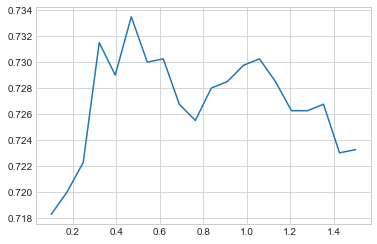

In [6]:
max_C = 1.5
cs = np.linspace(0.1, max_C, 20)

pca = PCA(n_components=40, random_state=42)

svm_pca_scores_c = []
for c in cs:
    svm = SVC(C=c, kernel="linear", random_state = 42)
    model = make_pipeline(pca, svm)
    cv_scores = cross_val_score(model, X, y, cv=10)
    avg_score = np.mean(cv_scores)
    svm_pca_scores_c.append(avg_score)
    print(f"\r{round(c,2)} / {max_C}", end="")

plt.plot(cs, svm_pca_scores_c)

0.7 / 0.77

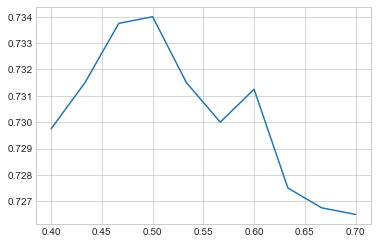

In [8]:
max_C = 0.7
cs = np.linspace(0.4, max_C, 10)

pca = PCA(n_components=40, random_state=42)

svm_pca_scores_c = []
for c in cs:
    svm = SVC(C=c, kernel="linear", random_state = 42)
    model = make_pipeline(pca, svm)
    cv_scores = cross_val_score(model, X, y, cv=10)
    avg_score = np.mean(cv_scores)
    svm_pca_scores_c.append(avg_score)
    print(f"\r{round(c,2)} / {max_C}", end="")

plt.plot(cs, svm_pca_scores_c)